In [205]:
import pandas as pd
import numpy as np

In [206]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
submission = pd.read_csv('sample_submission.csv')

## EDA

In [207]:
X_train.shape, X_test.shape, y_train.shape

((365696, 12), (121984, 12), (2857, 3))

In [208]:
X_train.head()

,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,2216,0,0.89372,0.42188,0.072242,0.13441,0.285480,-0.025868,-0.20274,2.12330,4.8540,-11.4400
1,2216,1,0.89363,0.42216,0.072101,0.13417,0.228130,0.015971,-0.23027,-2.34010,6.3516,-6.2703
2,2216,2,0.89351,0.42245,0.072062,0.13411,0.056796,0.028566,-0.24816,-0.55226,6.1428,-5.8172
3,2216,3,0.89337,0.42273,0.072142,0.13412,-0.036974,0.090653,-0.23842,-1.37340,4.2345,-8.4540
4,2216,4,0.89328,0.42300,0.071939,0.13395,0.054789,0.039615,-0.24534,-2.56650,1.2390,-12.0610


In [209]:
y_train.head()

,series_id,group_id,surface
0,2216,41,concrete
1,1078,3,soft_pvc
2,3184,37,soft_pvc
3,2049,71,tiled
4,3805,55,tiled


In [210]:
submission.head()

,series_id,surface
0,1103,concrete
1,2846,concrete
2,2479,concrete
3,3376,concrete
4,2194,concrete


for the same series_id we can see many rows of data. We can group them using groupby() method of pd.DataFrame 
(but not now)

In [211]:
X_test.head()

,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,1103,0,-0.85873,0.49008,0.069792,-0.13243,0.026578,0.023158,-0.10345,-0.071960,3.8741,-9.1924
1,1103,1,-0.85880,0.48996,0.069771,-0.13243,0.012501,0.029135,-0.10680,-0.202820,3.4666,-9.7502
2,1103,2,-0.85886,0.48987,0.069759,-0.13239,0.026332,0.037792,-0.11092,-0.210840,3.2951,-10.0300
3,1103,3,-0.85894,0.48974,0.069712,-0.13237,0.036332,0.041477,-0.12051,0.020759,3.4349,-9.8501
4,1103,4,-0.85902,0.48961,0.069671,-0.13233,0.043599,0.030823,-0.11257,-0.185600,3.1375,-9.6028


In [212]:
X_train.describe()

,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
count,365696.000000,365696.00000,365696.000000,365696.000000,365696.000000,365696.000000,365696.000000,365696.000000,365696.000000,365696.000000,365696.000000,365696.000000
mean,1893.995450,63.50000,-0.024966,0.084542,0.013791,-0.004868,0.000061,0.007033,-0.015188,0.130034,2.884359,-9.366137
std,1093.591426,36.94934,0.682910,0.709621,0.106299,0.103882,0.118691,0.087666,0.224496,1.886067,2.167729,2.871613
min,1.000000,0.00000,-0.989070,-0.989650,-0.162830,-0.155100,-2.371000,-0.890860,-1.259300,-36.067000,-121.490000,-75.386000
25%,947.000000,31.75000,-0.705935,-0.691220,-0.090490,-0.105750,-0.041014,-0.033444,-0.089007,-0.530760,1.954300,-10.195000
50%,1904.000000,63.50000,-0.129355,0.252600,0.033405,-0.021737,-0.000069,0.005123,-0.004816,0.128540,2.877600,-9.365600
75%,2838.000000,95.25000,0.640950,0.817740,0.124520,0.093077,0.040525,0.047011,0.063961,0.797315,3.799400,-8.519700
max,3808.000000,127.00000,0.989100,0.988980,0.155070,0.154770,2.282200,1.079100,1.387300,35.647000,73.008000,65.839000


In [213]:
y_train.describe()

,series_id,group_id
count,2857.000000,2857.000000
mean,1893.995450,37.564928
std,1093.781369,20.951276
min,1.000000,0.000000
25%,947.000000,19.000000
50%,1904.000000,39.000000
75%,2838.000000,55.000000
max,3808.000000,72.000000


In [214]:
y_train.describe(include='object')

,surface
count,2857
unique,9
top,concrete
freq,584


we have 2857 rows in y_train. 584 of them is concrete - (top) . 9 unique types of surface exist

In [215]:
X_train.dtypes

series_id                  int64
measurement_number         int64
orientation_X            float64
orientation_Y            float64
orientation_Z            float64
orientation_W            float64
angular_velocity_X       float64
angular_velocity_Y       float64
angular_velocity_Z       float64
linear_acceleration_X    float64
linear_acceleration_Y    float64
linear_acceleration_Z    float64
dtype: object

all columns are either integers or floats

In [216]:
X_train.isnull().sum()

series_id                0
measurement_number       0
orientation_X            0
orientation_Y            0
orientation_Z            0
orientation_W            0
angular_velocity_X       0
angular_velocity_Y       0
angular_velocity_Z       0
linear_acceleration_X    0
linear_acceleration_Y    0
linear_acceleration_Z    0
dtype: int64

In [217]:
y_train.isnull().sum()

series_id    0
group_id     0
surface      0
dtype: int64

no missing values 

<AxesSubplot: xlabel='count', ylabel='surface'>

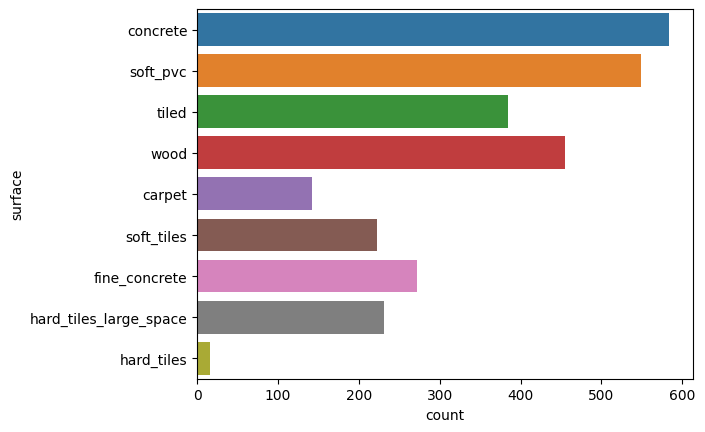

In [218]:
import seaborn as sns

sns.countplot(data=y_train, y = 'surface')

In [219]:
X_train.columns

Index(['series_id', 'measurement_number', 'orientation_X', 'orientation_Y',
       'orientation_Z', 'orientation_W', 'angular_velocity_X',
       'angular_velocity_Y', 'angular_velocity_Z', 'linear_acceleration_X',
       'linear_acceleration_Y', 'linear_acceleration_Z'],
      dtype='object')

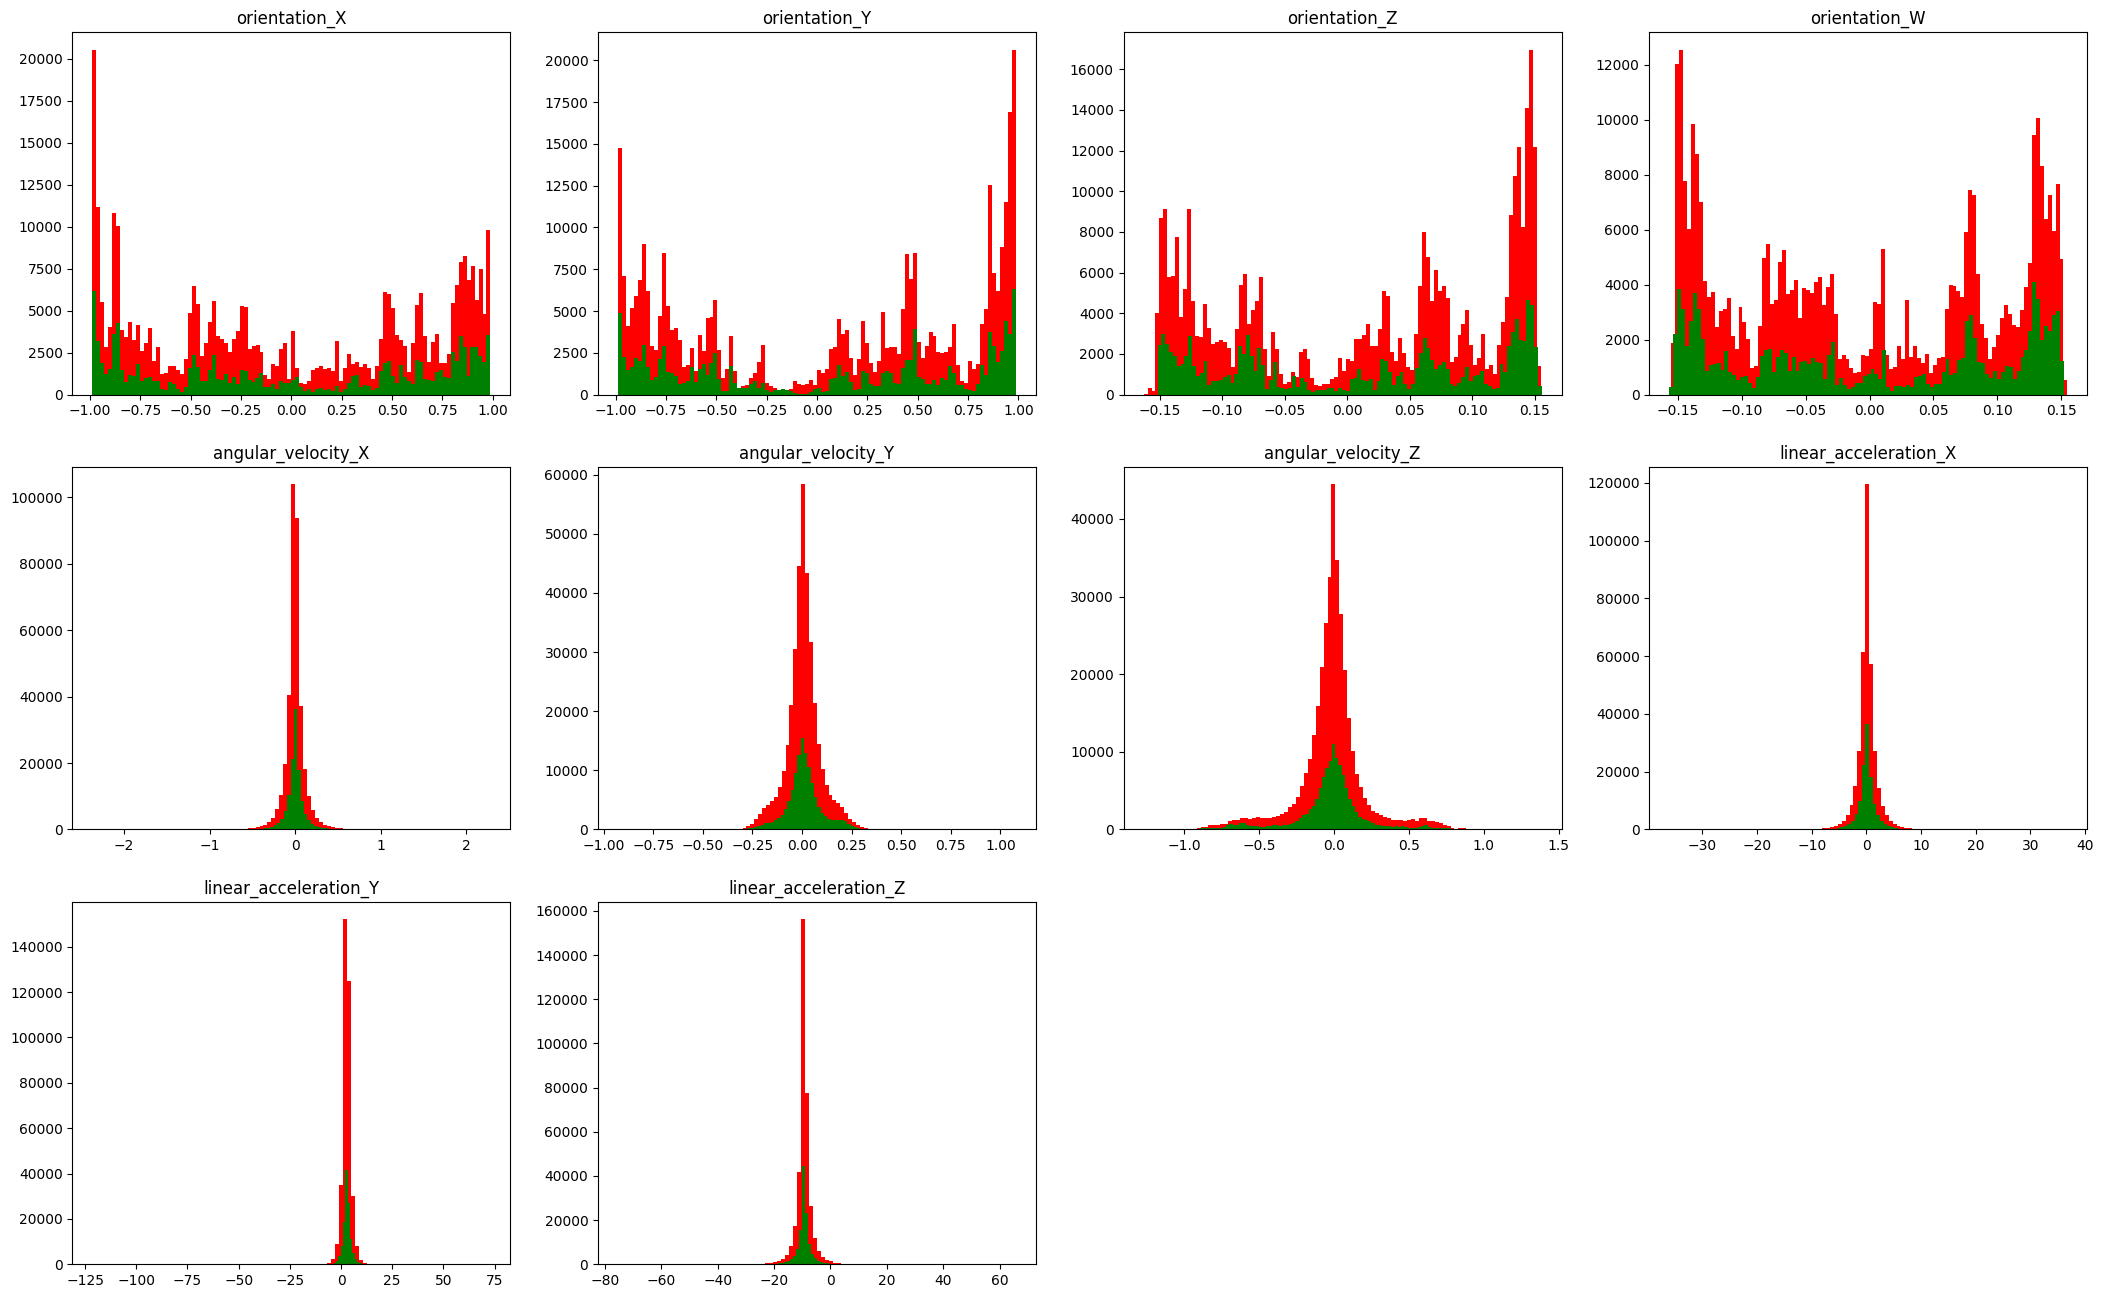

In [220]:
import matplotlib.pyplot as plt

plt.figure(figsize=(26,16))

for i, col in enumerate(X_train.columns[2:]):
    plt.subplot(3, 4, i+1)
    plt.hist(X_train[col], color='red', bins=100)
    plt.hist(X_test[col], color='green', bins=100)
    plt.title(col)

we  can see normal distribution in velocity and acceleration

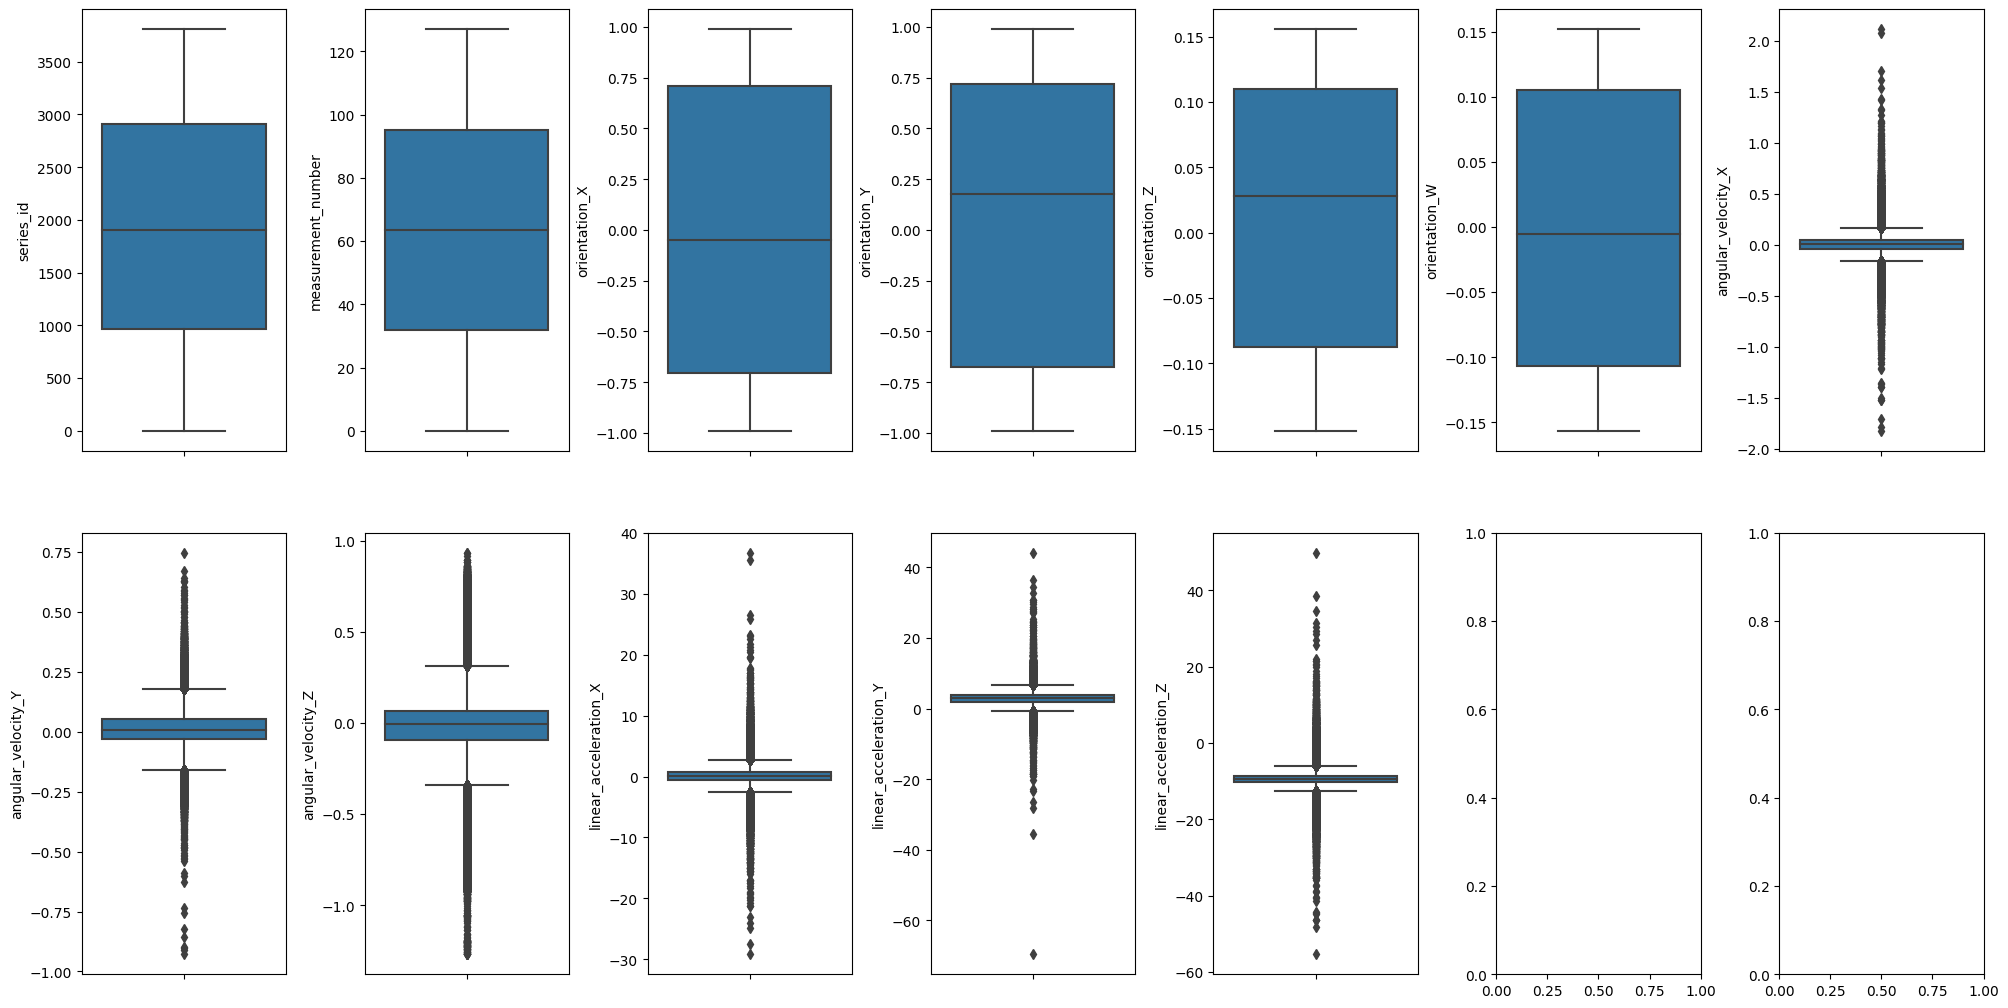

In [221]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10)) 
index = 0
axs = axs.flatten()
for k,v in X_test.items():
    sns.boxplot(y=k, data=X_test, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

our boxplots show that there are outliers in velocity and acceleration

<AxesSubplot: >

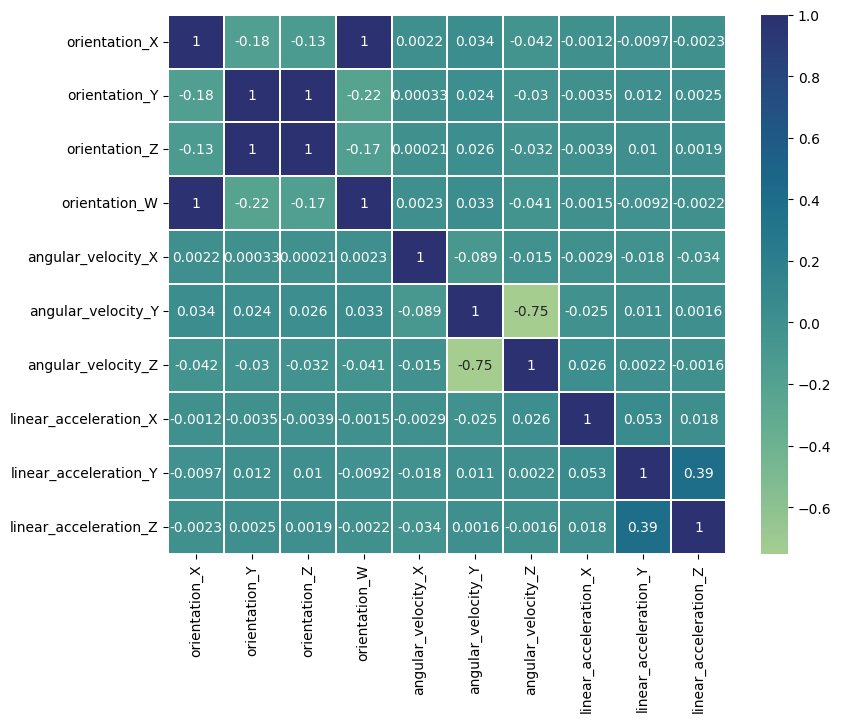

In [222]:
plt.subplots(figsize=(9, 7))
sns.heatmap(X_train.iloc[:,2:].corr(), annot=True, cmap='crest', linewidths=0.2)

## feature engineering 

In [223]:
X_train = X_train.groupby(['series_id']).mean()
X_train.shape

(2857, 11)

In [224]:
X_test = X_test.groupby(['series_id']).mean()
X_test.shape

(953, 11)

In [225]:
df_train = pd.merge(X_train, y_train, how='left', on='series_id')
df_train.shape

(2857, 14)

In [226]:
df_train.head()

,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z,group_id,surface
0,1,63.5,-0.958606,0.241867,0.031650,-0.146876,0.004605,-0.007757,0.006206,0.121867,2.768193,-9.388899,31,concrete
1,3,63.5,-0.939169,0.310140,0.038955,-0.142319,0.000624,-0.002804,0.007887,0.201791,2.657922,-9.451164,31,concrete
2,4,63.5,-0.891301,0.428144,0.060056,-0.136460,0.006969,0.046109,-0.142385,-0.086171,2.981498,-9.349988,22,soft_tiles
3,5,63.5,0.464712,-0.872496,-0.127264,0.081212,-0.007366,-0.000134,-0.006881,0.109911,2.668945,-9.285242,1,tiled
4,6,63.5,-0.402356,-0.903141,-0.140541,-0.051849,0.010419,0.017725,-0.050957,0.175171,2.640550,-9.465020,34,soft_pvc


In [227]:
encode_map=dict()
index = 0
for i in list(df_train['surface'].unique()):
    encode_map[i] = index
    index += 1

print(f"Encode map: {encode_map}")


decode_map=dict()
index = 0
for i in list(df_train['surface'].unique()):
    decode_map[index] = i
    index += 1

print(f"Decode map: {decode_map}")

df_train['surface'] = df_train['surface'].map(encode_map)


Encode map: {'concrete': 0, 'soft_tiles': 1, 'tiled': 2, 'soft_pvc': 3, 'hard_tiles_large_space': 4, 'carpet': 5, 'fine_concrete': 6, 'hard_tiles': 7, 'wood': 8}
Decode map: {0: 'concrete', 1: 'soft_tiles', 2: 'tiled', 3: 'soft_pvc', 4: 'hard_tiles_large_space', 5: 'carpet', 6: 'fine_concrete', 7: 'hard_tiles', 8: 'wood'}


In [228]:
df_train.sample(5)

,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z,group_id,surface
526,690,63.5,-0.025179,-0.988017,-0.152106,0.006789,-0.000827,0.019489,-0.055056,0.220279,3.109875,-9.357738,35,6
1842,2426,63.5,0.885672,-0.439743,-0.059716,0.136547,-0.005303,0.006348,-0.005981,-0.065154,2.653924,-9.431503,46,8
2286,3031,63.5,-0.493099,0.856050,0.130950,-0.082958,0.000419,0.010690,-0.016077,0.080332,3.136477,-9.356515,70,3
1405,1873,63.5,-0.988669,0.015249,-0.004538,-0.149258,0.006556,0.006139,-0.016770,0.070311,3.086032,-9.304459,66,2
850,1129,63.5,-0.948913,0.277966,0.035814,-0.144968,0.001238,0.004824,-0.010272,0.260447,2.239615,-9.583046,31,0


In [229]:
df_train.drop(columns=["series_id","group_id"],inplace=True)

# model


In [230]:
df_train.sample(5)

,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z,surface
1999,63.5,-0.505680,0.849869,0.122572,-0.083569,0.007692,-0.007733,0.017674,0.005173,2.954810,-9.380296,0
1209,63.5,0.371181,-0.916491,-0.135921,0.061589,0.003763,0.005738,-0.020145,0.059067,3.039520,-9.314121,1
1182,63.5,-0.936926,0.317369,0.040012,-0.140864,0.000041,0.012258,-0.023049,0.199729,2.730887,-9.368344,0
2360,63.5,-0.318334,0.935331,0.142923,-0.057169,0.002700,0.072525,-0.223873,0.210822,2.901179,-9.347041,2
769,63.5,0.987174,0.051475,0.016276,0.148354,0.001041,0.155431,-0.493325,-0.016581,2.314951,-9.515087,3


In [231]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train = scaler.fit_transform(df_train[df_train.columns[:-1]])

In [232]:
x_train, x_test, y_train, y_test = train_test_split(train, df_train['surface'], test_size = 0.1)

In [233]:
x_test.shape

(286, 11)

In [248]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

for i in range(4,10):
    model = XGBClassifier(max_depth = i)
    model.fit(x_train, y_train)

    predictions = model.predict(x_test)
    
    print(f"Max_depth {i} , accuracy : ", accuracy_score(predictions, y_test))
  

Max_depth 4 , accuracy :  0.7307692307692307
Max_depth 5 , accuracy :  0.7447552447552448
Max_depth 6 , accuracy :  0.7622377622377622
Max_depth 7 , accuracy :  0.7482517482517482
Max_depth 8 , accuracy :  0.7482517482517482
Max_depth 9 , accuracy :  0.7517482517482518


In [235]:
predictions.shape

(286,)

In [236]:
y_test.shape

(286,)

In [238]:
X_test.sample(5)
# X_test.drop(columns=["series_id"],inplace=True)

,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
series_id,,,,,,,,,,,
2388,63.5,0.953287,0.259644,0.049983,0.143013,-0.007488,-0.189750,0.613535,0.474203,3.045452,-9.316527
1684,63.5,-0.337741,0.928633,0.141992,-0.058068,0.007622,-0.043509,0.128010,0.383965,2.881389,-9.219010
2500,63.5,-0.952274,-0.263479,-0.045330,-0.143433,0.010742,0.213135,-0.688131,-0.091846,2.939964,-9.354155
1879,63.5,0.729883,0.666385,0.106128,0.109244,-0.017881,0.014720,-0.038453,-0.140370,2.674500,-9.478704
968,63.5,-0.957152,0.247799,0.031304,-0.146534,0.000624,-0.001258,0.029102,0.069165,3.101386,-9.342402


In [239]:
predictions_kaggle = model.predict(X_test)

In [240]:
predictions_kaggle.shape

(953,)

In [241]:
submission = pd.read_csv('sample_submission.csv')

submission.shape

(953, 2)

In [243]:
submission['surface'] = predictions_kaggle

submission.sample(5)

,series_id,surface
96,1113,8
271,2201,0
642,1933,8
250,3649,8
751,1863,6


In [244]:
submission['surface'] = submission['surface'].map(decode_map)

In [245]:
submission.sample(5)

,series_id,surface
844,2191,fine_concrete
435,270,fine_concrete
551,2503,fine_concrete
870,368,carpet
253,1628,fine_concrete


In [246]:
submission.to_csv('submission_xg4.csv', index=False)